# <font style="color:rgb(50,120,229)">HoughCircles : Detect circles in an image with OpenCV</font>

In the case of line Hough transform, we required two parameters, $(\theta, \rho)$ but to detect circles, we require three parameters:

- $(x, y)$ coordinates of the center of the circle.
- radius.

As you can imagine, a circle detector will require a **3D accumulator** — one for each parameter.

The equation of a circle is given by

$\begin{align*} (x - x_0)^2 + (y - y_0)^2 = r^2 \end{align*} \tag{2}$

The following steps are followed to detect circles in an image: –

1. Find the edges in the given image with the help of edge detectors (**Canny**).
2. For detecting circles in an image, we set a threshold for the maximum and minimum value of the radius.
3. Evidence is collected in a 3D accumulator array for the presence of circles with different centers and radii.

The function [**`HoughCircles`**](https://docs.opencv.org/4.1.0/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d) is used in OpenCV to detect the circles in an image.

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
circles = cv.HoughCircles( image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
```

**Parameters**


- **`image`** -	8-bit, single-channel binary source image. The image may be modified by the function.
- **`circles`** -	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
- **`method`** -	Detection method. Currently, the only implemented method is **`HOUGH_GRADIENT`**
- **`dp`** -	Inverse ratio of the accumulator resolution to the image resolution. For example, if `dp=1` , the accumulator has the same resolution as the input image. If `dp=2` , the accumulator has half as big width and height.
- **`minDist`** -	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
- **`param1`** -	First method-specific parameter. In case of **`HOUGH_GRADIENT`** , it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller).
- **`param2`** -	Second method-specific parameter. In case of **`HOUGH_GRADIENT`** , it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
- **`minRadius`** -	Minimum circle radius.
- **`maxRadius`** -	Maximum circle radius. If `<= 0`, uses the maximum image dimension. If `< 0`, returns centers without finding the radius.

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

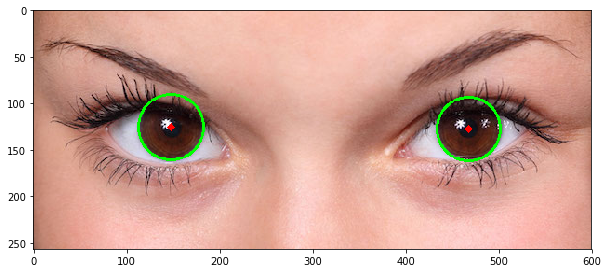

In [3]:
# Read image as gray-scale
img = cv2.imread(DATA_PATH + 'images/circles.jpg', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, 50, param1=450, param2=10, minRadius=30, maxRadius=40)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(img[:,:,::-1])